In [2]:
%reload_ext autoreload
%autoreload 2
from airplane_system import AirplaneSystem
import numpy as np
from proj_helpers import *
import time
from IPython.display import HTML

In [12]:
# 6D state (x, z, V, gamma, theta, q)
x0 = np.array([0.0, 1.3, 6.0, 0.0, 5.0*np.pi/180.0, 0.0])
airplane = AirplaneSystem()
input_trajectory, state_trajectory_approx, time_array = airplane.trajOpt(x0, dircol=0, second_pass=False)
# input_trajectory_2, state_trajectory_approx_2, time_array_2 = airplane.trajOpt(x0, dircol=1, second_pass=True)


Number of decision vars 1287
** solver begin with N = 160 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 12.1 seconds **

t_f computed: 16.667 seconds
cost computed: 3108.372


computing TVLQR along trajectory
finer dynamics simulated


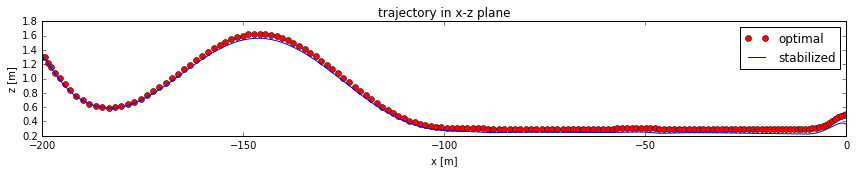

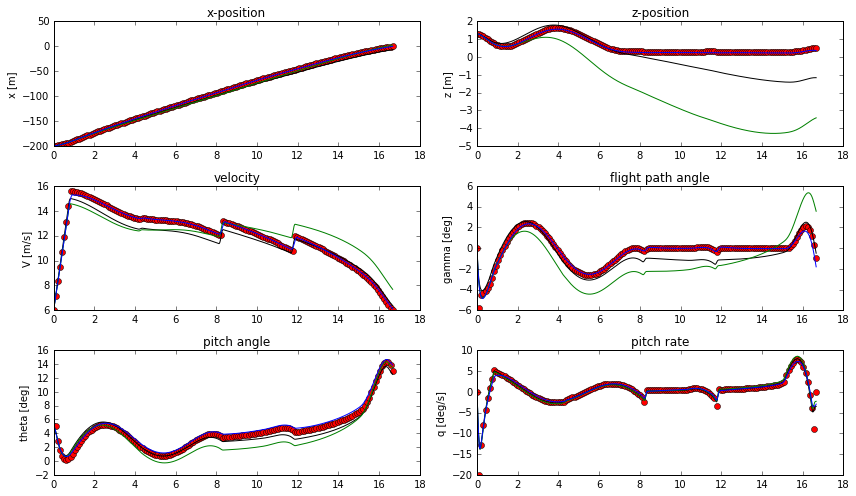

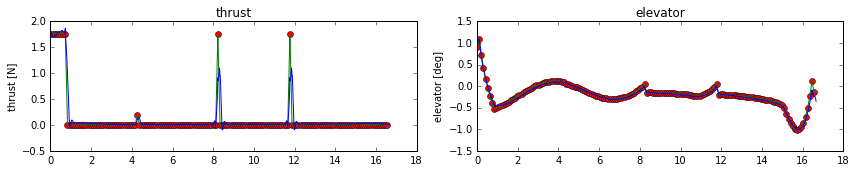

In [13]:
trajplot = simAndCompare(airplane, x0)
trajplot.tight_layout()
trajplot.show()

In [ ]:
knots_full = range(len(airplane.ttraj)-1)
t0 = time.time()
rho_full = getRho(airplane, knots_full, False)
t1 = time.time()
print('sweep finished in %.2f seconds' % (t1-t0))

i:  0 , knot:  0 , rho:  0.0480541992188
i:  1 , knot:  1 , rho:  0.04271484375
i:  2 , knot:  2 , rho:  0.0405457305908
i:  3 , knot:  3 , rho:  0.0304092979431
i:  4 , knot:  4 , rho:  0.03796875
i:  5 , knot:  5 , rho:  0.0360406494141
i:  6 , knot:  6 , rho:  0.03796875
i:  7 , knot:  7 , rho:  0.0320361328125
i:  8 , knot:  8 , rho:  0.0360406494141
i:  9 , knot:  9 , rho:  0.0284765625
i:  10 , knot:  10 , rho:  0.0456139469147


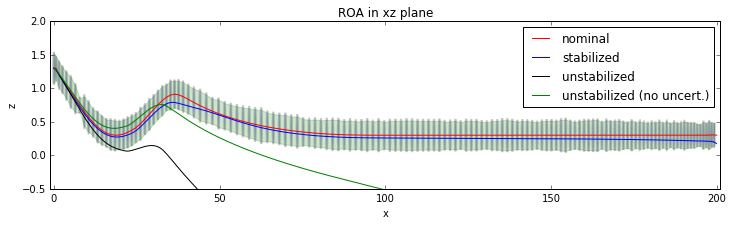

In [9]:
funnelplot = plotTrajFunnel(airplane, rho_full, knots_full)
funnelplot.legend(('nominal', 'stabilized', 'unstabilized', 'unstabilized (no uncert.)'))
funnelplot.show()

In [72]:
horizontal_starts = np.arange(0,151,5)
x0_sweep = np.zeros((horizontal_starts.shape[0], x0.shape[0]))
sys_sweep = []

for i, start in enumerate(horizontal_starts):
    x0_sweep[i,:] = x0
    x0_sweep[i,0] = start
    if np.mod(i, 2) == 0:
        x0_sweep[i,1] = x0[1] - 0.5

    sys = AirplaneSystem()
    utraj, xtraj, ttraj = sys.trajOpt(x0_sweep[i,:], dircol=0, second_pass=False)
    sys_sweep.append(sys)
    print 'i: ', i, ', tf: ', ttraj[-1]


Number of decision vars 1287
** solver begin with N = 160 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 8.2 seconds **

t_f computed: 16.667 seconds
cost computed: 3243.994
i:  0 , tf:  16.6666666667
Number of decision vars 1255
** solver begin with N = 156 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 10.9 seconds **

t_f computed: 16.250 seconds
cost computed: 2949.080
i:  1 , tf:  16.25
Number of decision vars 1223
** solver begin with N = 152 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 6.8 seconds **

t_f computed: 15.833 seconds
cost computed: 2899.850
i:  2 , tf:  15.8333333333
Number of decision vars 1191
** solver begin with N = 148 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 5.7 seconds **

t_f computed: 15.417 seconds
cost computed: 2647.841
i:  3 , tf:  15.4166666667
Number of decision vars 1159
** solver begin with N = 144 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 9.6 seconds **

t_f computed

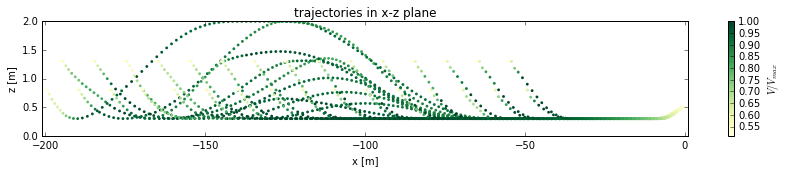

In [73]:
plotMultipleTraj(sys_sweep)

In [71]:
viz = urdfViz(airplane)
plt.close()
HTML(viz.to_html5_video())

Spawning PlanarRigidBodyVisualizer for tree with 0 actuators


<IPython.core.display.Javascript object>


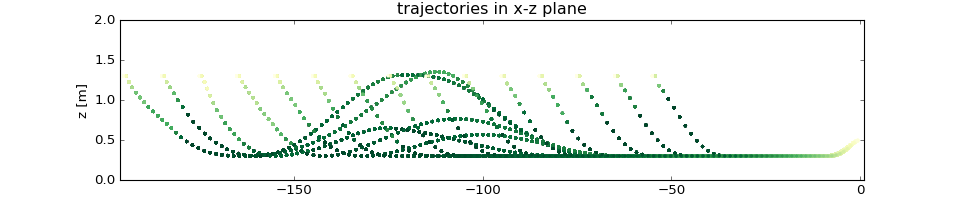

In [182]:
%matplotlib nbagg
animateMultipleTraj(sys_sweep[1::2], saveprefix='figs/v3_step')